In [2]:
import math
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder 
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import pdist, squareform
from collections import Counter
from scipy import stats
%matplotlib inline

df = pd.read_csv("C:/Users/Mario/Desktop/UniPi/1° semestre/Data Mining 1/Datasets/DatasetProject1/df.csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,MonthlyIncome,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsInCurrentRole,YearsWithCurrManager
0,27.0,Yes,Travel_Frequently,Sales,15,2,Medical,59,1,Male,...,4298.0,1.0,6,Divorced,3.0,7,2.0,2,2,2
1,30.0,Yes,Travel_Rarely,Sales,16,4,Marketing,70,1,Male,...,5304.0,2.0,2,Married,4.0,10,8.0,0,0,0
2,56.0,No,Non-Travel,Research & Development,2,4,Technical Degree,60,4,Male,...,6306.0,2.0,2,Divorced,4.0,12,12.0,1,3,4
3,41.0,Yes,Travel_Rarely,Human Resources,18,5,Human Resources,89,4,Male,...,6430.0,4.0,0,Married,3.0,2,2.0,0,0,0
4,42.0,No,Travel_Rarely,Research & Development,1,3,Life Sciences,76,4,Male,...,2766.0,6.0,3,Married,4.0,12,5.0,1,3,0


# DBSCAN CLUSTERING

In [3]:
clustering = df[["Age", "MonthlyIncome", "HourlyRate"]]
clustering.head()

,Age,MonthlyIncome,HourlyRate
0,27.0,4298.0,59
1,30.0,5304.0,70
2,56.0,6306.0,60
3,41.0,6430.0,89
4,42.0,2766.0,76


In [4]:
scaler = RobustScaler()
X = scaler.fit_transform(clustering.values)

In [5]:
scaler.transform(clustering.values)

array([[-0.9195693 , -0.17168356, -0.19444444],
       [-0.64684203,  0.13265769,  0.11111111],
       [ 1.71679433,  0.43578884, -0.16666667],
       ...,
       [ 0.0804307 ,  0.14445621,  0.66666667],
       [-0.01047839, -0.83209802,  0.83333333],
       [-0.37411476,  0.0851611 ,  0.27777778]])

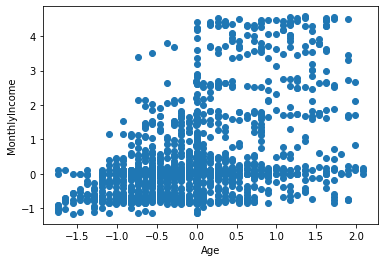

In [6]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel("Age")
plt.ylabel("MonthlyIncome")
plt.show()

In [7]:
dbscan = DBSCAN(eps=0.5, min_samples=7)
dbscan.fit(X)

DBSCAN(min_samples=7)

In [8]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([  21, 1342,   96], dtype=int64))

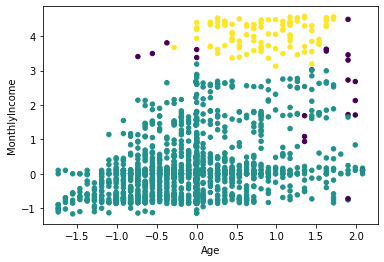

In [10]:
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, s=20)

plt.xlabel("Age")
plt.ylabel("MonthlyIncome")

plt.show()

In [11]:
print("Silhouette: ", silhouette_score(X, dbscan.labels_))

Silhouette:  0.48601194588463326


In [12]:
dist = pdist(X, 'euclidean') #pairwise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[0.51026264 2.70558821 1.65235759 ... 0.99483687 0.60113397 1.13235933]

[[0.         0.51026264 2.70558821 ... 1.35700284 1.52280028 0.76582221]
 [0.51026264 0.         2.39913023 ... 0.91526324 1.36283425 0.32313135]
 [2.70558821 2.39913023 0.         ... 1.85930231 2.36453128 2.16618824]
 ...
 [1.35700284 0.91526324 1.85930231 ... 0.         0.99483687 0.60113397]
 [1.52280028 1.36283425 2.36453128 ... 0.99483687 0.         1.13235933]
 [0.76582221 0.32313135 2.16618824 ... 0.60113397 1.13235933 0.        ]]


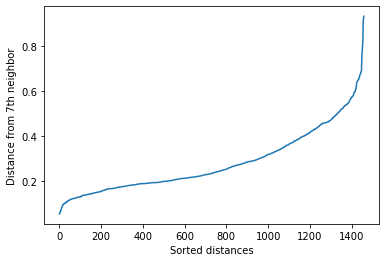

In [13]:
k = 7
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    

plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('Distance from %sth neighbor' % k, fontsize=10)
plt.xlabel('Sorted distances', fontsize=10)
plt.show()